图像处理时，有些图像可能在 RGB 颜色空间信息不如转换到其它颜色空间更清晰.  
这里整理下关于颜色空间的知识，以及 python-opencv 的实现.

图像处理中有多种色彩空间，例如 RGB、HLS、HSV、HSB、YCrCb、CIE XYZ、CIE Lab 等，经常要遇到色彩空间的转化，以便生成 mask 图等操作.

颜色空间也称彩色模型 (彩色空间，彩色系统)，主要是在某些标准下用通常可接受的方式对彩色加以说明.

本质上，彩色模型是坐标系统和子空间的阐述. 位于系统的每种颜色都有单个点表示.

在彩色图像处理中，选择合适的彩色模型是很重要的. 从应用的角度来看，众多彩色模型可以分为两类:

[1] - 面向诸如彩色显示器或彩色打印机之类输出显示场合使用的硬设备.

[2] - 面向视觉感知或者说以彩色处理分析为目的的应用，如动画中的彩色图形，各种图像处理的算法等.(这里主要是图像处理.)

# 1. 几种颜色空间

## 1.1. RGB

RGB (Red 红色，Green 绿色，Blue 蓝色)，是根据人眼识别的颜色而定义的空间，可用于表示大部分颜色，也是图像处理中最基本、最常用、面向硬件的颜色空间，是一种光混合的体系.

RGB颜色空间最常用的用途就是**显示器系统**，彩色阴极射线管,彩色光栅图形的显示器都使用R、G、B数值来驱动R、G、B 电子枪发射电子，并分别激发荧光屏上的R、G、B三种颜色的荧光粉发出不同亮度的光线，并通过相加混合产生各种颜色。扫描仪也是通过吸收原稿经反射或透射而发送来的光线中的R、G、B成分，并用它来表示原稿的颜色。

**模型:**

![](../assets/rgb.jpg)

RGB 颜色模式用三维空间中的一个点表示一种颜色，每个点有三个分量，分别表示红、绿、蓝的亮度值，亮度值限定为 [0, 1].

在 RGB 模型的立方体中，
- 原点对应的颜色为黑色，它的三个分量值都为 0；  
- 距离原点最远的顶点对应的颜色为白色，三个分量值都为 1.  
- 从黑色到白色的灰度值分布在这两个点的连线上，该虚线称为**灰度线**.  - 立方体的其余各点对应不同的颜色，即三原色红、绿、蓝及其混合色黄、品红、青色.

![](../assets/rgb2.jpg)



## 1.3. HSI

HSI 颜色空间可以用一个圆锥空间模型来描述，能清晰表现色调 (Hue)、饱和度(Saturation, Chroma) 和亮度 (Intensity, Brightness) 的变化情形.

- H  (Hue) 色相  - 表示颜色的相位角. 红、绿、蓝分别相隔 120 度；互补色分别相差 180 度，即颜色的类别.

-  S  (Saturation)饱和度 - 色彩的强度或纯度. 表示成所选颜色的纯度和该颜色最大的纯度之间的比率，范围：[0, 1]，即颜色的深浅程度.

-  I  (Intensity)亮度 - 表示颜色的明亮程度，通常以 0% (黑色) 到 100% (白色) 的百分比来衡量 (人眼对亮度很敏感).

**模型:**

![pic](../assets/hsi.jpg)

>HSI 色彩空间和 RGB 色彩空间只是同一物理量的不同表示法，它们之间可以进行相互转换：HSI 颜色模式中的色调使用颜色类别表示，饱和度与颜色的白光光亮亮度刚好成反比，代表灰色与色调的比例，亮度是颜色的相对明暗程度.

## CMYK

CMYK是一种**依靠反光**的色彩模式，我们是怎样阅读报纸的内容呢？是由阳光或灯光照射到报纸上，再反射到我们的眼中，才看到内容。它需要有外界光源，如果你在黑暗房间内是无法阅读报纸的。只要在屏幕上显示的图像，就是RGB模式表现的。只要是在印刷品上看到的图像，就是CMYK模式表现的。大多数在纸上沉积彩色颜料的设备，如彩色打印机和复印机，要求输入CMY数据，在内部进行RGB到CMY的转换。

**模型:**

![](../assets/cmyk.png)

**青色Cyan、品红色Magenta、黄色Yellow是光的二次色**，是颜料的颜色。**而K取的是black最后一个字母**，之所以不取首字母，是为了避免与蓝色(Blue)混淆。当红绿蓝三原色被混合时，会产生白色，当混合青色、品红色、黄色三原色时会产生黑色。从理论上来说，只需要CMY三种油墨就足够了，但是由于目前制造工艺还不能造出高纯度的油墨，CMY相加的结果实际是一种暗红色。


## YUV（YCbCr）

YUV 颜色空间在 PAL，NTSC和 SECAM**复合颜色视频标准**中使用。采用YUV色彩空间的重要性是**它的亮度信号Y和色度信号U、V是分离的。**  
黑白电视系统只使用亮度信号（Y）；彩色电视采用YUV空间正是为了用亮度信号Y**解决彩色电视机与黑白电视机的兼容问题**，色度信号（U，V）以一种特殊的方式加入亮度信号，这样，黑白电视接收机能够显示正常的黑白图像，而彩色电视接收机能够对对附加的色度信号进行解码从而显示彩色图像。

**人眼对色度的敏感程度要低于对亮度的敏感程度。**人类视网膜上的视网膜杆细胞要多于视网膜锥细胞，说得通俗一些，**视网膜杆细胞的作用就是识别亮度，而视网膜锥细胞的作用就是识别色度**。所以，你的眼睛对于亮和暗的分辨要比对颜色的分辨精细一些。正是因为这个，在我们的视频存储中，没有必要存储全部颜色信号。所以把YUV分开存储，Y信号是黑白信号，是以全分辨率存储的，而色度信号并不是用全分辨率存储的。

**模型:**

![](../assets/yuv.jpg)

>颜色空间是一系列颜色的数学表现形式。三种最流行的颜色模型是RGB（用于计算机图形）；**YIQ，YUV或YCbCr（用于视频系统）和CMYK（用于彩色打印）**。但是，这三种颜色没有一种和我们直觉概念上的色调，饱和度，亮度有直接的联系。这就使我们暂时去追寻其它的模型，如HIS和HSV，它们能简化编程，处理和终端用户操作。

- 4：4：4  
    Y,Cb,Cr具有同样的水平和垂直取样率，每4个亮度像素，相应的就有4个Cb和4个Cr。

- 4：2：2  
    Y,Cb,Cr具有同样的垂直取样率，但水平取样率色度分量是亮度分量的一半，即水平方向上，每4个亮度像素，相应的就有2个Cb和2个Cr。

- 4：2：0  
    **水平和垂直取样率色度分量都是亮度分量的一半**，即水平垂直方向上，每4个亮度像素，相应的就有1个Cb和1个Cr。但这个命名始终没有搞清楚，“0”到底代表什么，据说是为了和“4：4：4“、”4：2：2”命名格式一致而沿用的。这种采用格式应用非常广泛，最适合进行数字压缩。


## LAB 颜色空间

LAB 全称是 CIELAB，CIE 代表 International Commission on Illumination(国际照明委员会)，它是一个关于光照、颜色等的国际权威组织.

LAB 颜色空间由一个亮度通道和两个颜色通道组成的. 在 LAB 颜色空间中，每个颜色用 L、A、B 三个数字表示，其中，各个分量的含义是：

[1] - L - 亮度

[2] - A - 从绿色到红色的分量

[3] - B - 从蓝色到黄色的分量

LAB 是基于人对颜色的感觉来设计的，更具体地说，它是感知均匀 (perceptual uniform) 的。Perceptual Uniform 的意思是，如果数字（即前面提到的 L、A、B 这三个数）变化的幅度一样，那么它给人带来视觉上的变化幅度也差不多.(**注**：Helmholtz–Kohlrausch effect 是人眼的一种错觉——当色彩饱和度高时，颜色会看起来更亮.)

LAB 相较于 RGB 与 CMYK 等颜色空间更符合人类视觉，也更容易调整：**想要调节亮度，就调节 L 通道，想要调节只色彩平衡就分别调 A 和 B**.

理论上说，L、A、B 都是实数，一般限定在一个整数范围内：

*   L 越大，亮度越高。L 为 0 时代表黑色，为 100 时代表白色。
*   A 和 B 为 0 时都代表灰色。
*   A 从负数变到正数，对应颜色从绿色变到红色。
*   B 从负数变到正数，对应颜色从蓝色变到黄色。
*   在实际应用中常常将颜色通道的范围 [-100, +100] 或[-128, 127]之间。

# 空间转换

## RGB转HSI

![](../assets/rgb2hsi.jpg)

## HSI转RGB

给定 HSI空间中的 (h, s, l) 值定义的一个颜色，带有 h 在指示色相角度的值域 [0, 360）中，分别表示饱和度和亮度的s 和 l 在值域 [0, 1] 中，相应在 RGB 空间中的 (r, g, b) 三原色，带有分别对应于红色、绿色和蓝色的 r, g 和 b 也在值域 [0, 1] 中，它们可计算为：

首先，如果 s = 0，则结果的颜色是非彩色的、或灰色的。在这个特殊情况，r, g 和 b 都等于 l。注意 h 的值在这种情况下是未定义的。当 s ≠ 0 的时候，可以使用下列过程

![](../assets/hsi2rgb.png)

## RGB转CMYK

![](../assets/rgb2cmyk.png)

## RGB与YUV 转换

![](../assets/rgb2yuv.png)

RGB->YCbCr

     Y = 0.299R + 0.587G + 0.114B
     Cb = 0.564*(B-Y)
     Cr = 0.713*(R-Y)

其中 Y 表示亮度， Cb Cr 表示色度。

YCbCr->RGB

    R = Y + 1.402*Cr
    G = Y - 0.344*Cb - 0.714*Cr
    B = Y + 1.772*Cb

           

# cv2.cvtColor() 颜色转换函数

In [2]:
%matplotlib inline

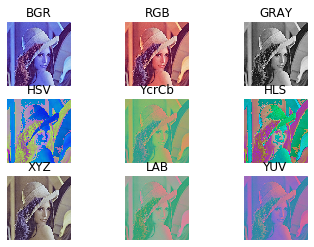

In [3]:
import matplotlib.pyplot as plt 
import cv2


img_BGR = cv2.imread('../assets/lena.jpg') # BGR 
plt.subplot(3,3,1)
plt.imshow(img_BGR);plt.axis('off');plt.title('BGR')

img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
plt.subplot(3,3,2)
plt.imshow(img_RGB);plt.axis('off');plt.title('RGB')

img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)
plt.subplot(3,3,3);
# matplotlib默认以彩色图显示图像，不是RGB三通道的会自行渲染成RGB格式，可以在参数里设置：
plt.imshow(img_GRAY, cmap=plt.cm.gray);plt.axis('off');plt.title('GRAY')

img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
plt.subplot(3,3,4)
plt.imshow(img_HSV);plt.axis('off');plt.title('HSV')

img_YcrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)
plt.subplot(3,3,5)
plt.imshow(img_YcrCb);plt.axis('off');plt.title('YcrCb')

img_HLS = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HLS)
plt.subplot(3,3,6)
plt.imshow(img_HLS);plt.axis('off');plt.title('HLS')

img_XYZ = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2XYZ)
plt.subplot(3,3,7)
plt.imshow(img_XYZ);plt.axis('off');plt.title('XYZ')

img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)
plt.subplot(3,3,8)
plt.imshow(img_LAB);plt.axis('off');plt.title('LAB')

img_YUV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YUV)
plt.subplot(3,3,9)
plt.imshow(img_YUV);plt.axis('off');plt.title('YUV')
plt.show()

In [3]:
img_HSV.shape

(256, 256, 3)

In [4]:
from PIL import Image

img_pil = Image.fromarray(img_GRAY); img_pil.show()

#  参考

- [数字图像处理 颜色空间 RGB、HSI、CMYK、YUV 的相互转换](https://blog.csdn.net/aoshilang2249/article/details/38070663)

- [opencv︱图像的色彩空間 cvtColor（HSV、HSL、HSB ）及相关色彩学](https://blog.csdn.net/sinat_26917383/article/details/70860910)

- [彻底搞懂 Lab 颜色空间](https://blog.csdn.net/gdymind/article/details/82357139)

- [OpenCV - Changing Colorspaces](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html?highlight=cvtcolor)

- [Python cv2.cvtColor() Examples](https://www.programcreek.com/python/example/89426/cv2.cvtColor)